In [26]:
import os 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import cv2
import csv

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip

!unzip train2017.zip

os.remove("/content/train2017.zip")

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

!unzip val2017.zip

os.remove("/content/val2017.zip")

In [ ]:
! gdown --id 1thErEToRbmM9uLNi1JXXfOsaS5VK2FXf

Downloading...
From: https://drive.google.com/uc?id=1thErEToRbmM9uLNi1JXXfOsaS5VK2FXf
To: /content/coco_wholebody_train_v1.0.json
3.16GB [00:32, 97.1MB/s]


In [ ]:
! gdown --id 1N6VgwKnj8DeyGXCvp1eYgNbRmw6jdfrb

Downloading...
From: https://drive.google.com/uc?id=1N6VgwKnj8DeyGXCvp1eYgNbRmw6jdfrb
To: /content/coco_wholebody_val_v1.0.json
133MB [00:01, 112MB/s]


In [52]:
!ls

coco_wholebody_train_v1.0.json	sample_data  val2017
coco_wholebody_val_v1.0.json	train2017


In [53]:
TRAIN_DIR = "/content/train2017/"
VAL_DIR = "/content/val2017/"

In [54]:
def plot_example_images(DIR,n):
    plt.figure(0, figsize=(12,20))
    ctr = 0
    
    for i in range(0,n):
      ctr += 1
      plt.subplot(7,5,ctr)
      img = load_img(DIR + os.listdir(DIR)[i])
      plt.imshow(img)

    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

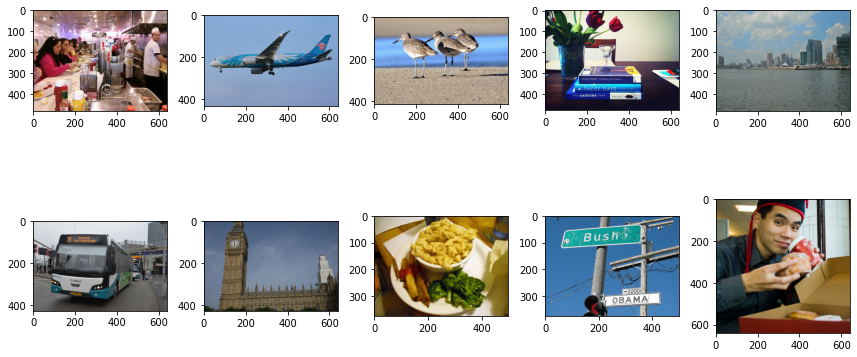

In [55]:
plot_example_images(TRAIN_DIR,10)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

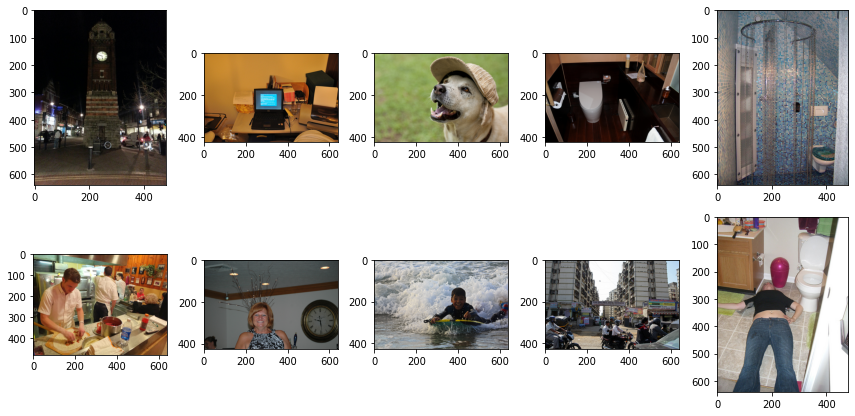

In [56]:
plot_example_images(VAL_DIR,10)

In [67]:
len(os.listdir(TRAIN_DIR))

118287

In [57]:
with open("/content/coco_wholebody_train_v1.0.json") as f:
  train_data = json.load(f)

In [58]:
train_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [59]:
train_ann = pd.DataFrame(train_data["annotations"])
train_img = pd.DataFrame(train_data["images"])
train_cat = pd.DataFrame(train_data["categories"])

In [64]:
train_img = train_img[["file_name","id"]]
train_img

,file_name,id
0,000000391895.jpg,391895
1,000000522418.jpg,522418
2,000000184613.jpg,184613
3,000000318219.jpg,318219
4,000000554625.jpg,554625
...,...,...
118282,000000444010.jpg,444010
118283,000000565004.jpg,565004
118284,000000516168.jpg,516168
118285,000000547503.jpg,547503


In [77]:
train_ann

,segmentation,num_keypoints,area,iscrowd,keypoints,image_id,bbox,category_id,id,face_box,lefthand_box,righthand_box,lefthand_kpts,righthand_kpts,face_kpts,face_valid,lefthand_valid,righthand_valid,foot_valid,foot_kpts
0,"[[267.03, 243.78, 314.59, 154.05, 357.84, 136....",8,28292.08625,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",537548,"[267.03, 104.32, 229.19, 320]",1,183020,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[[640, 408.25, 639.54, 4.33, 546.25, 5.29, 426...",2,39122.63310,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",117891,"[206.77, 1.44, 433.23, 408.73]",1,183030,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[[332.57, 119.02, 327.1, 82.24, 330.75, 41.08,...",4,5634.56940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",120021,"[276.12, 0.29, 61.18, 118.73]",1,183050,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[[364.84, 129.8, 363.74, 127.18, 363.52, 124.7...",0,672.72905,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",403255,"[355.87, 118.43, 30.84, 42.87]",1,183057,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[[187.03, 472.97, 192.43, 350.81, 181.62, 335....",13,26215.66095,0,"[0, 0, 0, 0, 0, 0, 252, 156, 2, 0, 0, 0, 248, ...",209468,"[178.38, 120.54, 114.59, 354.6]",1,183062,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[269.17, 273.54, 26.879999999999995, 19.489999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[274.08245, 283.13906, 1, 273.285115, 281.0128...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,True,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262460,"{'counts': [4138, 7, 418, 12, 413, 14, 1, 2, 1...",0,23580.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",128732,"[9, 284, 560, 141]",1,900100128732,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
262461,"{'counts': [111472, 7, 365, 11, 362, 13, 360, ...",0,25439.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",489186,"[298, 0, 341, 127]",1,900100489186,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
262462,"{'counts': [13254, 1, 316, 4, 6, 1, 315, 7, 31...",0,4227.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",390883,"[40, 104, 394, 43]",1,900100390883,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [116]:
imgid = train_img.id[0]
for idx,val in train_ann[train_ann.image_id==imgid]["bbox"].items():
  print(val)
#x,y,w,h =[339.88, 22.16, 153.88, 300.73]


[339.88, 22.16, 153.88, 300.73]
[471.64, 172.82, 35.92, 48.1]


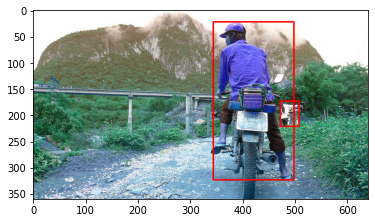

In [109]:
img = cv2.imread(TRAIN_DIR+train_img.file_name[0])
cv2.rectangle(img,(344,22),(154+344,301+22),(255,0,0),2)
cv2.rectangle(img,(472,173),(472+36,173+48),(255,0,0),2)
plt.imshow(img)

In [78]:
train_img.file_name[0]

'000000391895.jpg'